In [43]:
# 넘파이, 판다스 불러오기
import numpy as np
import pandas as pd
#시각화코드
import seaborn as sns
import math
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
!pip install teddynote
# 한국어 폰트 설정
font_path = "C:/Windows/Fonts/malgun.ttf"  # 맑은 고딕 폰트의 경로
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

ERROR: Could not find a version that satisfies the requirement tedynote (from versions: none)
ERROR: No matching distribution found for tedynote


In [2]:
df = pd.read_csv('train-student-mat.csv')
df.head(3)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,no,4,3,4,1,1,3,6,5
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,no,5,3,3,1,1,3,4,5
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,no,4,3,2,2,3,3,10,7


In [3]:
df_por= pd.read_csv("train-student-por.csv")

In [4]:
merged_df = pd.concat([df, df_por], axis=0)
merged_df.head(1)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,no,4,3,4,1,1,3,6,5


In [5]:
df = merged_df.copy()

In [6]:
# df1 = pd.read_csv('train-student-mat.csv')
# df1.head(3)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1044 entries, 0 to 648
Data columns (total 31 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      1044 non-null   object
 1   sex         1044 non-null   object
 2   age         1044 non-null   int64 
 3   address     1044 non-null   object
 4   famsize     1044 non-null   object
 5   Pstatus     1044 non-null   object
 6   Medu        1044 non-null   int64 
 7   Fedu        1044 non-null   int64 
 8   Mjob        1044 non-null   object
 9   Fjob        1044 non-null   object
 10  reason      1044 non-null   object
 11  guardian    1044 non-null   object
 12  traveltime  1044 non-null   int64 
 13  studytime   1044 non-null   int64 
 14  failures    1044 non-null   int64 
 15  schoolsup   1044 non-null   object
 16  famsup      1044 non-null   object
 17  paid        1044 non-null   object
 18  activities  1044 non-null   object
 19  nursery     1044 non-null   object
 20  higher   

In [8]:
df1 = df.copy()

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'Medu'}>,
        <AxesSubplot:title={'center':'Fedu'}>,
        <AxesSubplot:title={'center':'traveltime'}>],
       [<AxesSubplot:title={'center':'studytime'}>,
        <AxesSubplot:title={'center':'failures'}>,
        <AxesSubplot:title={'center':'famrel'}>,
        <AxesSubplot:title={'center':'freetime'}>],
       [<AxesSubplot:title={'center':'goout'}>,
        <AxesSubplot:title={'center':'Dalc'}>,
        <AxesSubplot:title={'center':'Walc'}>,
        <AxesSubplot:title={'center':'health'}>],
       [<AxesSubplot:title={'center':'absences'}>,
        <AxesSubplot:title={'center':'G1'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

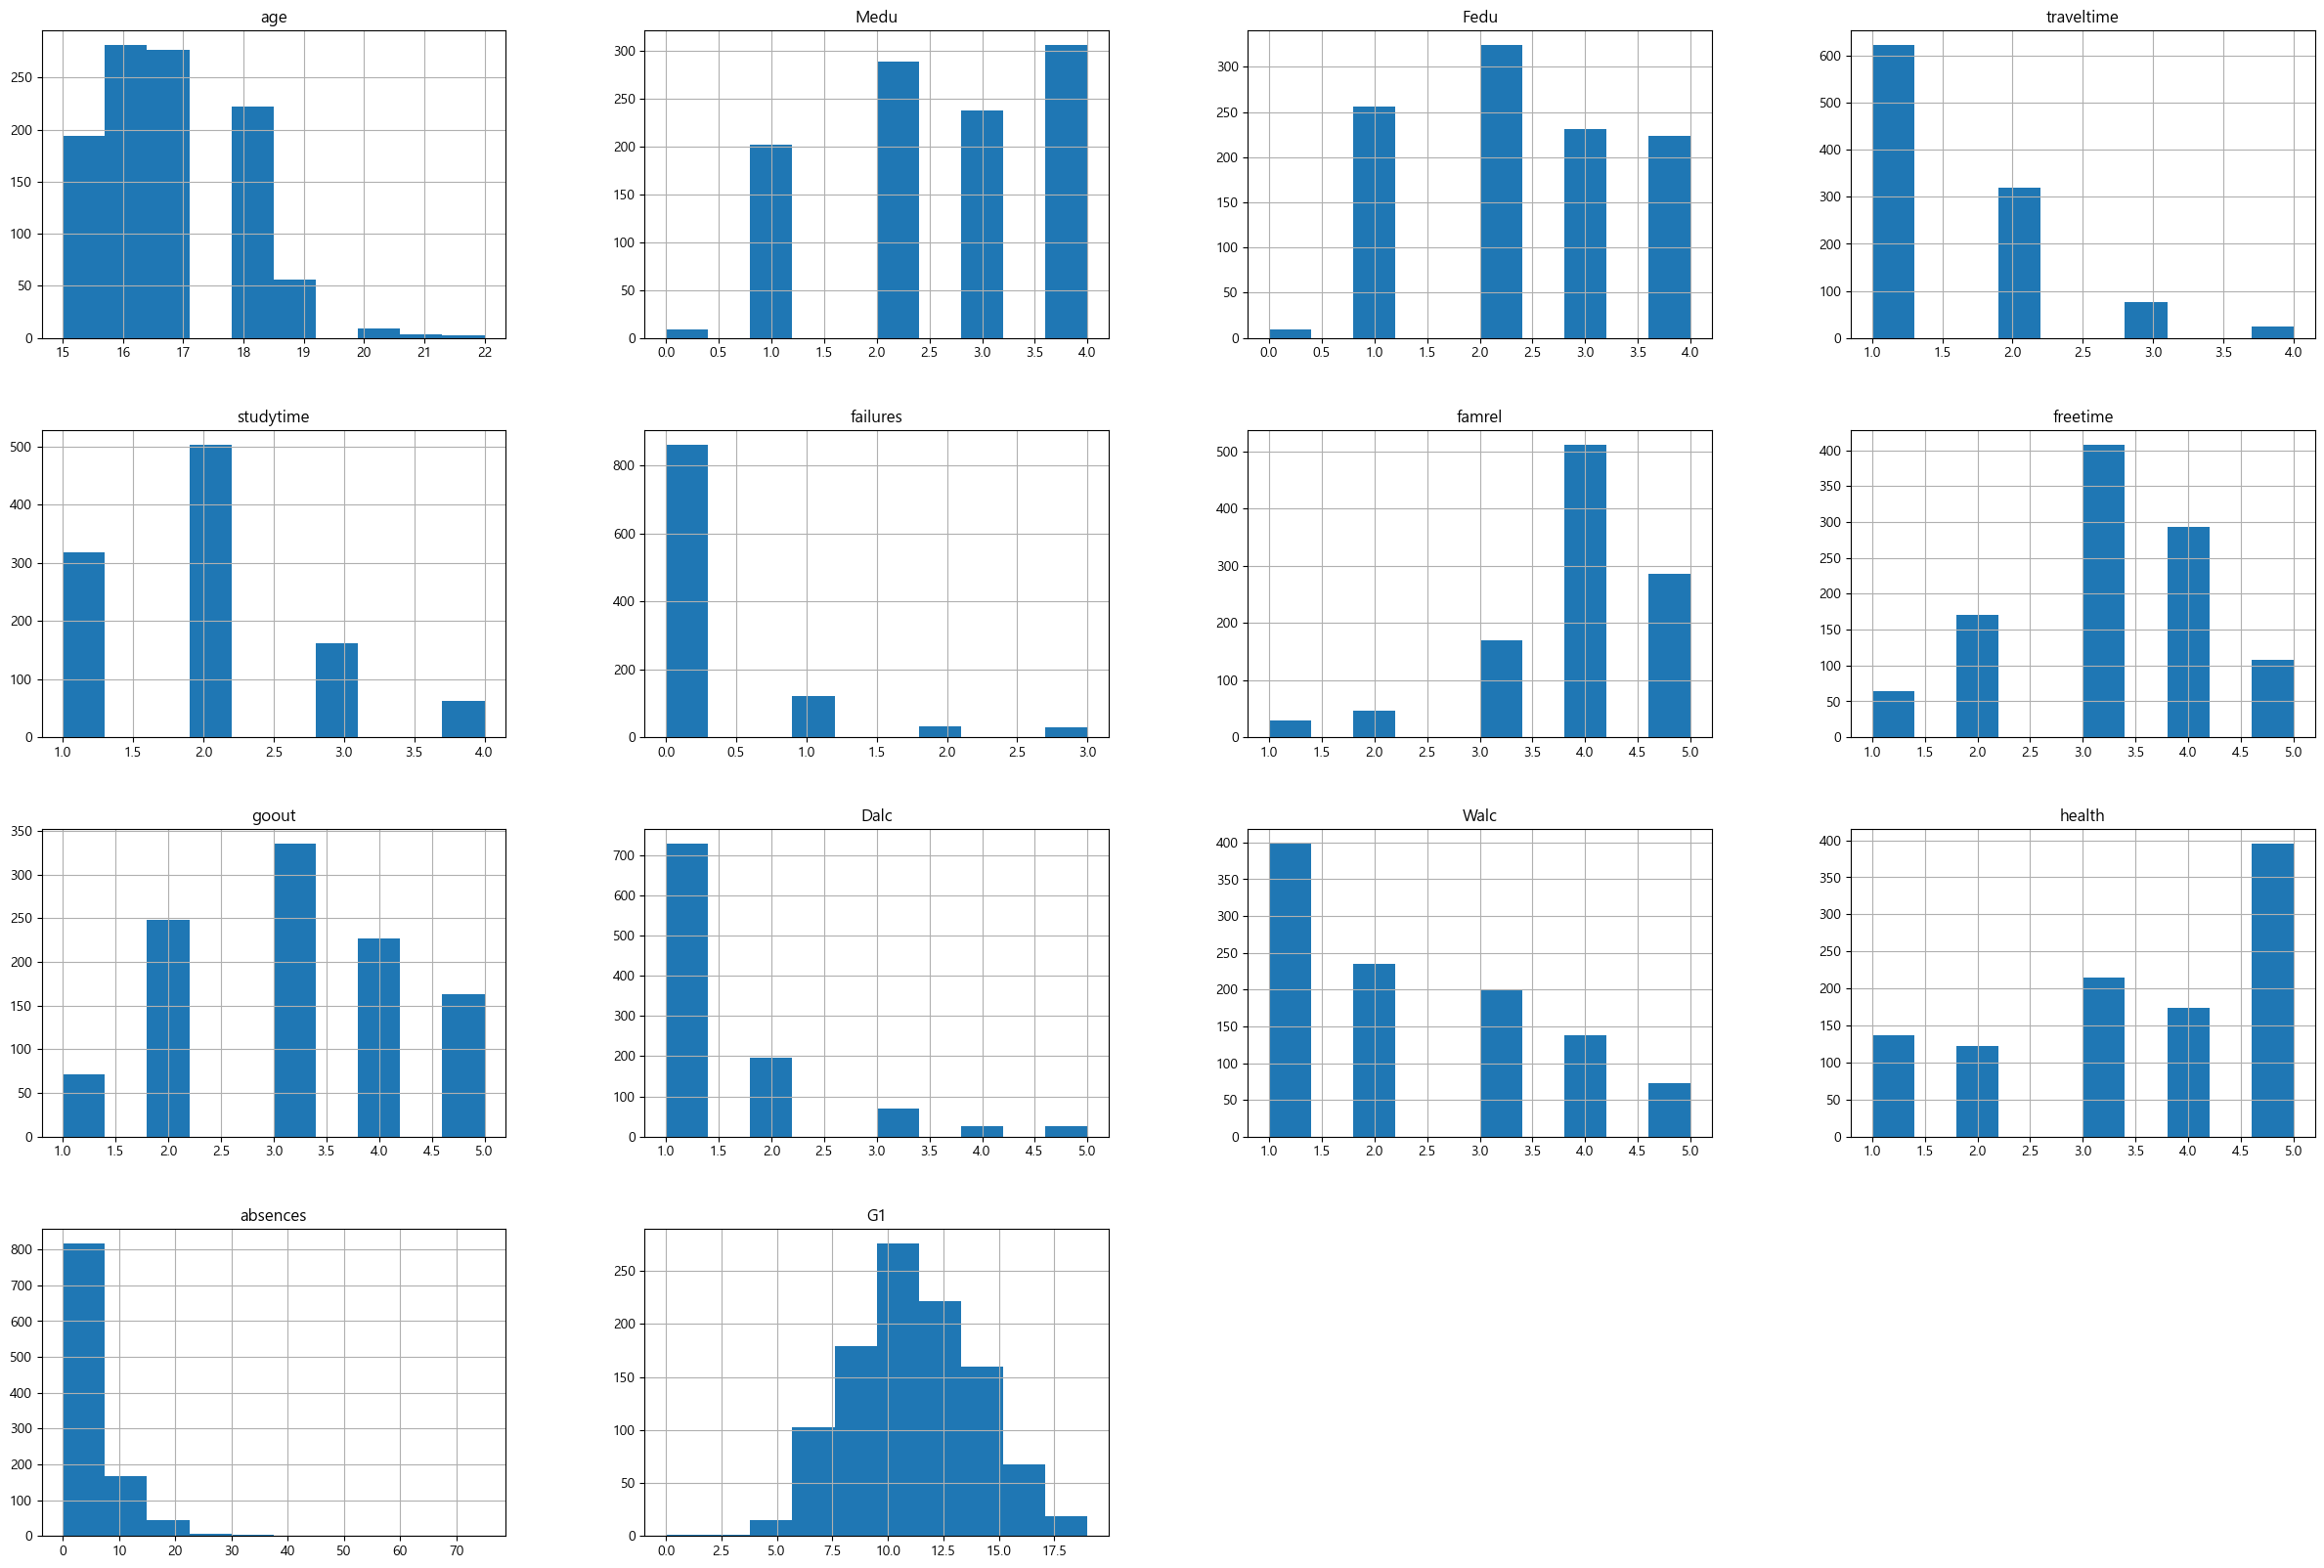

In [9]:
#데이터의 분포 확인
df1.hist(bins =10, figsize=(30,20))

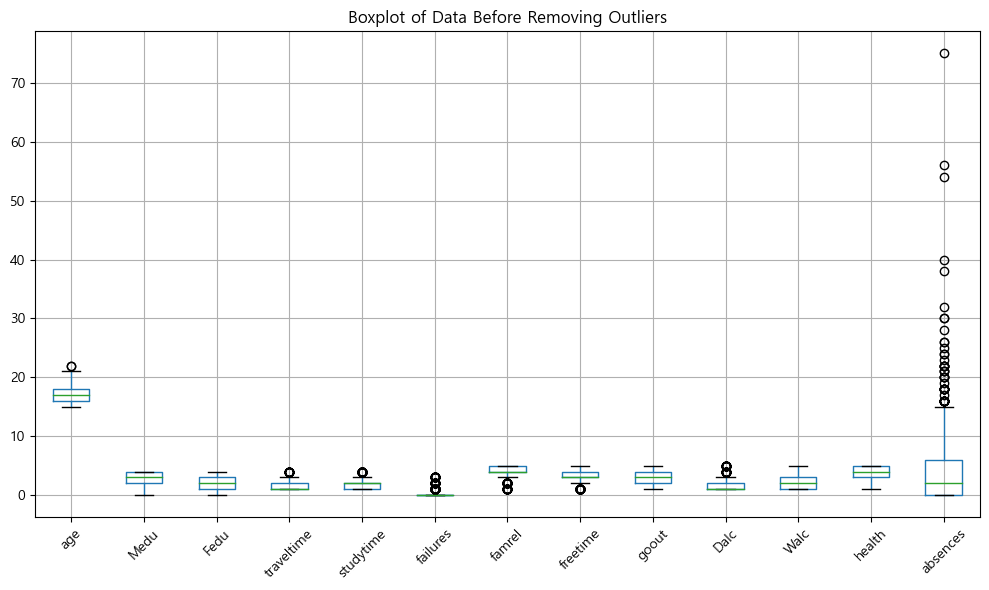

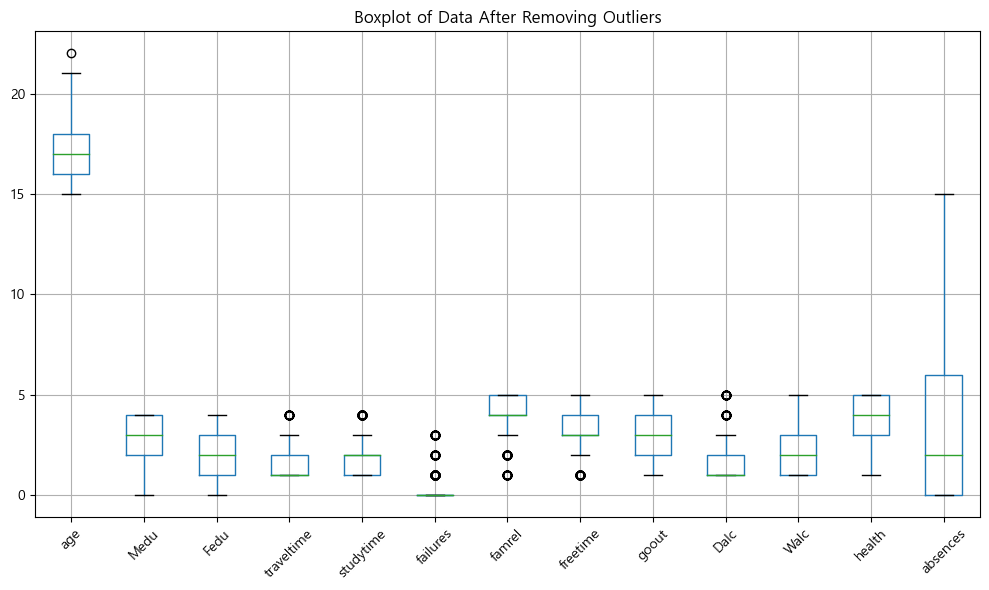

In [10]:
# 이상치 제거
def remove_outliers_iqr(df1, column_name):
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_filtered = df[(df[column_name] >= lower_bound) & (df[column_name] <= upper_bound)]
    return df_filtered

columns_to_remove_outliers = ['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences']

for column in columns_to_remove_outliers:
    df_remove_out = remove_outliers_iqr(df, column)

plt.figure(figsize=(10, 6))
plt.title('Boxplot of Data Before Removing Outliers')
df.boxplot(column=columns_to_remove_outliers)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
plt.title('Boxplot of Data After Removing Outliers')
df_remove_out.boxplot(column=columns_to_remove_outliers)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [11]:
df_remove_out.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 990 entries, 0 to 648
Data columns (total 31 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      990 non-null    object
 1   sex         990 non-null    object
 2   age         990 non-null    int64 
 3   address     990 non-null    object
 4   famsize     990 non-null    object
 5   Pstatus     990 non-null    object
 6   Medu        990 non-null    int64 
 7   Fedu        990 non-null    int64 
 8   Mjob        990 non-null    object
 9   Fjob        990 non-null    object
 10  reason      990 non-null    object
 11  guardian    990 non-null    object
 12  traveltime  990 non-null    int64 
 13  studytime   990 non-null    int64 
 14  failures    990 non-null    int64 
 15  schoolsup   990 non-null    object
 16  famsup      990 non-null    object
 17  paid        990 non-null    object
 18  activities  990 non-null    object
 19  nursery     990 non-null    object
 20  higher    

In [12]:
df1=df_remove_out.copy()

C:\Users\simhyunji\Anaconda3\lib\site-packages\seaborn\utils.py:95: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()


<AxesSubplot:>

C:\Users\simhyunji\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


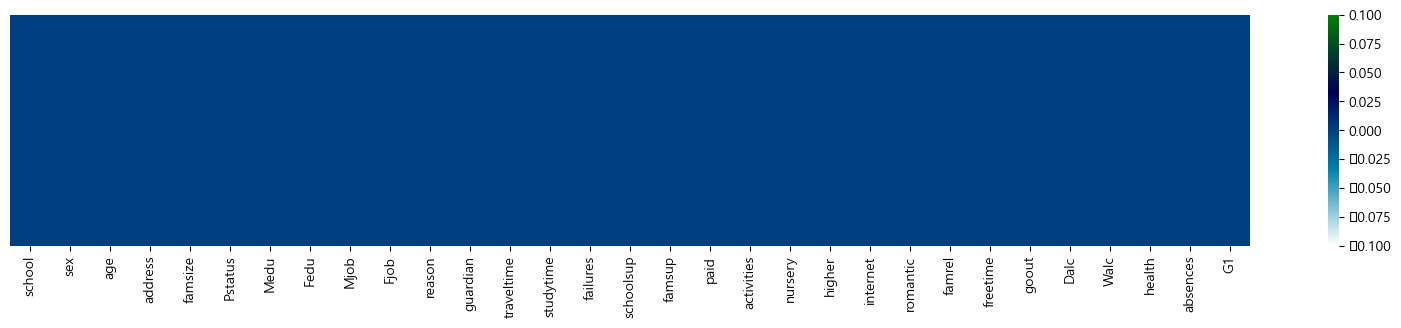

In [13]:
plt.figure(figsize=(20, 3))
sns.heatmap(df.isnull(), cbar=True, yticklabels=False, cmap='ocean_r')

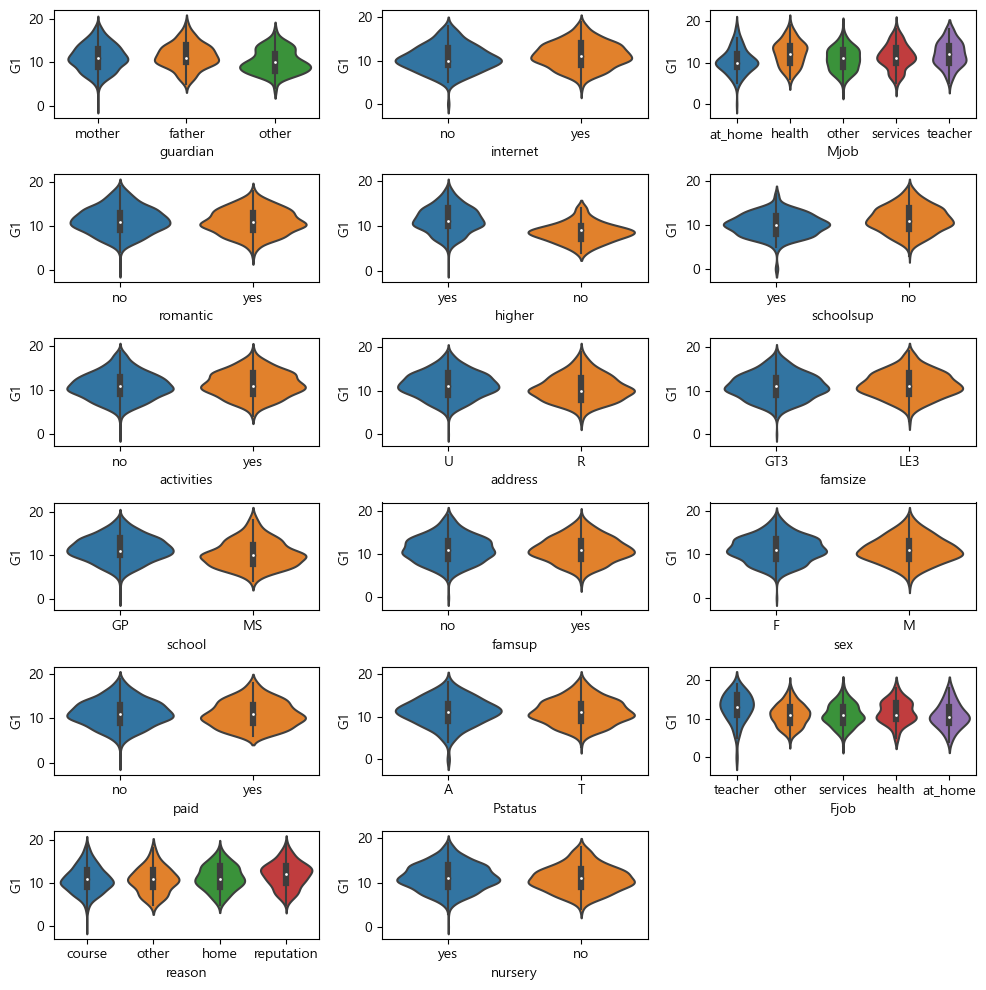

In [14]:
num_col = df1._get_numeric_data().columns.tolist()
cat_col = set(df1.columns) - set(num_col)
plt.figure(figsize=(10, 10))
for i, j in enumerate(cat_col):
    plt.subplot(6, 3, i+1)
    sns.violinplot(x=df[j], y=df['G1'])
plt.tight_layout()

In [15]:
#수치형 변수만 선택
numeric_columns = df1.select_dtypes(include=['float64', 'int64']).columns

#상관관계 계산
correlation_matrix = df1[numeric_columns].corr()

#상관관계 행렬 출력
print(correlation_matrix)

                 age      Medu      Fedu  traveltime  studytime  failures  \
age         1.000000 -0.132325 -0.137772    0.054447  -0.000932  0.257746   
Medu       -0.132325  1.000000  0.648308   -0.239238   0.104418 -0.197095   
Fedu       -0.137772  0.648308  1.000000   -0.200478   0.033693 -0.199438   
traveltime  0.054447 -0.239238 -0.200478    1.000000  -0.083116  0.094396   
studytime  -0.000932  0.104418  0.033693   -0.083116   1.000000 -0.149235   
failures    0.257746 -0.197095 -0.199438    0.094396  -0.149235  1.000000   
famrel     -0.007785  0.022534  0.026085   -0.006294   0.011746 -0.070453   
freetime    0.006895  0.005191  0.026915   -0.000460  -0.090337  0.102629   
goout       0.125305  0.012282  0.025665    0.053044  -0.071115  0.064532   
Dalc        0.114298 -0.004769 -0.002902    0.123245  -0.158959  0.098271   
Walc        0.098065 -0.046831  0.005495    0.096226  -0.227360  0.104958   
health     -0.020172 -0.008034  0.031775   -0.031303  -0.067478  0.064168   

C:\Users\simhyunji\Anaconda3\lib\site-packages\seaborn\utils.py:95: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
C:\Users\simhyunji\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


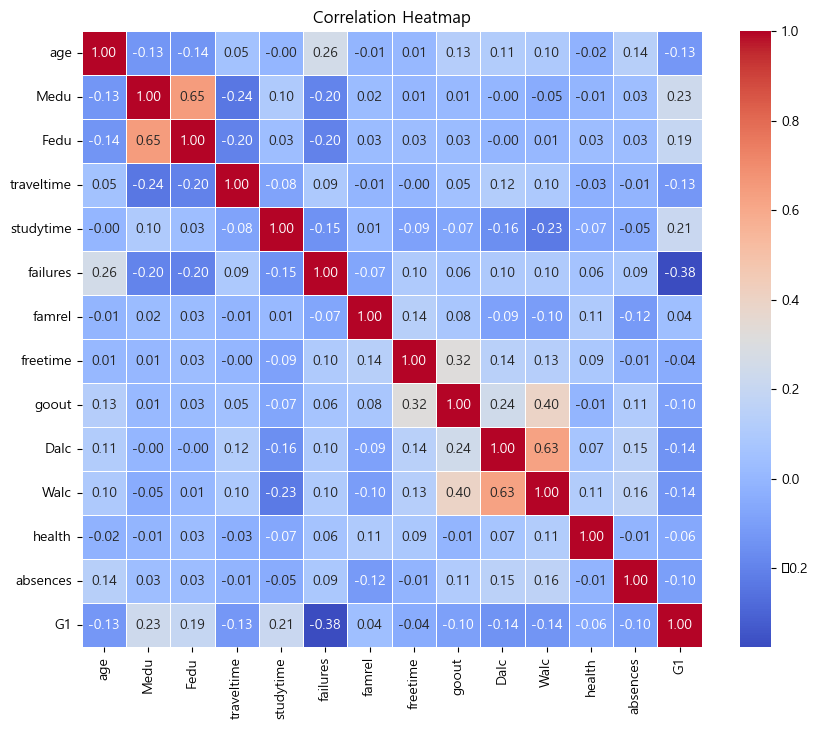

In [16]:
# 히트맵 그리기
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [17]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
school,1044,2,GP,772,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sex,1044,2,F,591,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,1044.0,NaN,NaN,NaN,16.726054,1.239975,15.0,16.0,17.0,18.0,22.0
address,1044,2,U,759,NaN,NaN,NaN,NaN,NaN,NaN,NaN
famsize,1044,2,GT3,738,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Pstatus,1044,2,T,923,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Medu,1044.0,NaN,NaN,NaN,2.603448,1.124907,0.0,2.0,3.0,4.0,4.0
Fedu,1044.0,NaN,NaN,NaN,2.387931,1.099938,0.0,1.0,2.0,3.0,4.0
Mjob,1044,5,other,399,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fjob,1044,5,other,584,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
# 컬럼명, 데이터 타입 출력
for i in df1.columns:
    print(i, df[i].dtype)

school object
sex object
age int64
address object
famsize object
Pstatus object
Medu int64
Fedu int64
Mjob object
Fjob object
reason object
guardian object
traveltime int64
studytime int64
failures int64
schoolsup object
famsup object
paid object
activities object
nursery object
higher object
internet object
romantic object
famrel int64
freetime int64
goout int64
Dalc int64
Walc int64
health int64
absences int64
G1 int64


In [19]:
# object 데이터타입이면, 리스트에 변수 이름 추가
obj = []
for i in df1.columns:
    if df1[i].dtype == 'object':
        obj.append(i)
obj

['school',
 'sex',
 'address',
 'famsize',
 'Pstatus',
 'Mjob',
 'Fjob',
 'reason',
 'guardian',
 'schoolsup',
 'famsup',
 'paid',
 'activities',
 'nursery',
 'higher',
 'internet',
 'romantic']

In [20]:
# 더미변환해도 될 거 같음
for i in obj:
    if df1[i].nunique() >= 1:
        print(i, df1[i].nunique())

school 2
sex 2
address 2
famsize 2
Pstatus 2
Mjob 5
Fjob 5
reason 4
guardian 3
schoolsup 2
famsup 2
paid 2
activities 2
nursery 2
higher 2
internet 2
romantic 2


In [21]:
df1['Medu'].value_counts()

4    292
2    275
3    217
1    197
0      9
Name: Medu, dtype: int64

In [22]:
df1['famrel'].value_counts()

4    486
5    273
3    156
2     46
1     29
Name: famrel, dtype: int64

In [23]:
df1['failures'].value_counts()

0    828
1    103
2     31
3     28
Name: failures, dtype: int64

In [24]:
df1['freetime'].value_counts()

3    389
4    277
2    163
5    101
1     60
Name: freetime, dtype: int64

In [25]:
# 데이터 변환 함수 정의
def convert_quality(value):
    if value == 1 or value == 2:
        return '나쁨'
    elif value == 3:
        return '보통'
    elif value == 4 or value == 5:
        return '좋음'

# 데이터 변환 적용
df1['famrel'] = df1['famrel'].apply(convert_quality)
df1['freetime'] = df1['freetime'].apply(convert_quality)
df1['goout'] = df1['goout'].apply(convert_quality)
df1['Dalc'] = df1['Dalc'].apply(convert_quality)
df1['Walc'] = df1['Walc'].apply(convert_quality)
df1['health'] = df1['health'].apply(convert_quality)

In [26]:
df1['traveltime'].value_counts()

1    590
2    302
3     74
4     24
Name: traveltime, dtype: int64

In [27]:
df1['studytime'].value_counts()

2    473
1    296
3    159
4     62
Name: studytime, dtype: int64

In [28]:
df1['failures'].value_counts()

0    828
1    103
2     31
3     28
Name: failures, dtype: int64

In [29]:
# traveltime 데이터 변환 함수 정의
def convert_travel_time(value):
    if value == 1:
        return '15분 미만'
    elif value == 2:
        return '15분에서 30분'
    elif value == 3:
        return '30분에서 1시간'
    elif value == 4:
        return '1시간 이상'

# studytime 데이터 변환 함수 정의
def convert_study_time(value):
    if value == 1:
        return '2시간 미만'
    elif value == 2:
        return '2에서 5시간'
    elif value == 3:
        return '5에서 10시간'
    elif value == 4:
        return '10시간 이상'

def convert_failures(value):
    if 1 <= value < 3:
        return '1회 이하'
    else:
        return '1회 초과'

# 데이터 변환 적용
df1['traveltime'] = df1['traveltime'].apply(convert_travel_time)
df1['studytime'] = df1['studytime'].apply(convert_study_time)
df1['failures'] = df1['failures'].apply(convert_failures)

In [30]:
def convert_education_level(value):
    if value == 0:
        return '없음'
    elif value == 1:
        return '초등교육(4학년)'
    elif value == 2:
        return '5~9학년'
    elif value == 3:
        return '고등교육'
    elif value == 4:
        return '고등교육'

# 데이터 변환 적용
df1['Medu'] = df1['Medu'].apply(convert_education_level)
df1['Fedu'] = df1['Fedu'].apply(convert_education_level)

In [31]:
pd.set_option('display.max_columns', None)
df1

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1
0,GP,F,18,U,GT3,A,고등교육,고등교육,at_home,teacher,course,mother,15분에서 30분,2에서 5시간,1회 초과,yes,no,no,no,yes,yes,no,no,좋음,보통,좋음,나쁨,나쁨,보통,6,5
1,GP,F,17,U,GT3,T,초등교육(4학년),초등교육(4학년),at_home,other,course,father,15분 미만,2에서 5시간,1회 초과,no,yes,no,no,no,yes,yes,no,좋음,보통,보통,나쁨,나쁨,보통,4,5
2,GP,F,15,U,LE3,T,초등교육(4학년),초등교육(4학년),at_home,other,other,mother,15분 미만,2에서 5시간,1회 초과,yes,no,yes,no,yes,yes,yes,no,좋음,보통,나쁨,나쁨,보통,보통,10,7
3,GP,F,15,U,GT3,T,고등교육,5~9학년,health,services,home,mother,15분 미만,5에서 10시간,1회 초과,no,yes,yes,yes,yes,yes,yes,yes,보통,나쁨,나쁨,나쁨,나쁨,좋음,2,15
4,GP,F,16,U,GT3,T,고등교육,고등교육,other,other,home,father,15분 미만,2에서 5시간,1회 초과,no,yes,yes,no,yes,yes,no,no,좋음,보통,나쁨,나쁨,나쁨,좋음,4,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,5~9학년,고등교육,services,other,course,mother,15분 미만,5에서 10시간,1회 이하,no,no,no,yes,no,yes,yes,no,좋음,좋음,나쁨,나쁨,나쁨,좋음,4,10
645,MS,F,18,U,LE3,T,고등교육,초등교육(4학년),teacher,services,course,mother,15분 미만,2에서 5시간,1회 초과,no,yes,no,no,yes,yes,yes,no,좋음,보통,좋음,나쁨,나쁨,나쁨,4,15
646,MS,F,18,U,GT3,T,초등교육(4학년),초등교육(4학년),other,other,course,mother,15분에서 30분,2에서 5시간,1회 초과,no,no,no,yes,yes,yes,no,no,나쁨,나쁨,나쁨,나쁨,나쁨,좋음,6,11
647,MS,M,17,U,LE3,T,고등교육,초등교육(4학년),services,services,course,mother,15분에서 30분,2시간 미만,1회 초과,no,no,no,no,no,yes,yes,no,나쁨,좋음,좋음,보통,좋음,나쁨,6,10


In [32]:
df1['failures'].value_counts()

1회 초과    856
1회 이하    134
Name: failures, dtype: int64

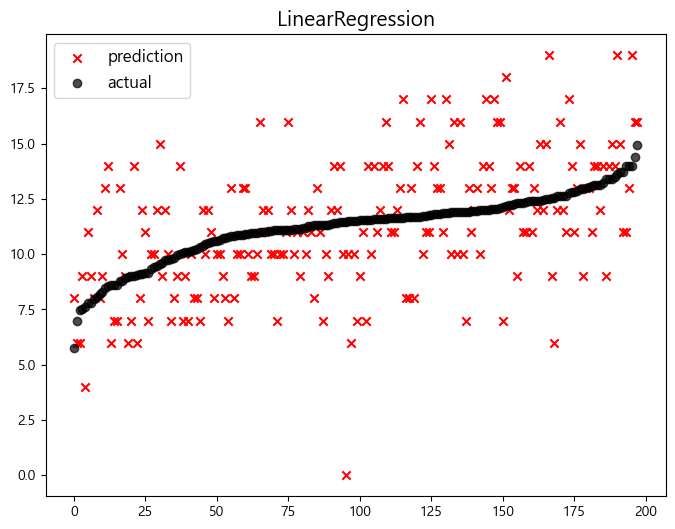

,model,error
0,LinearRegression,7.42504


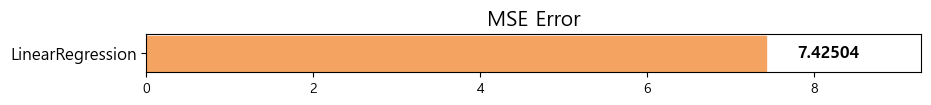

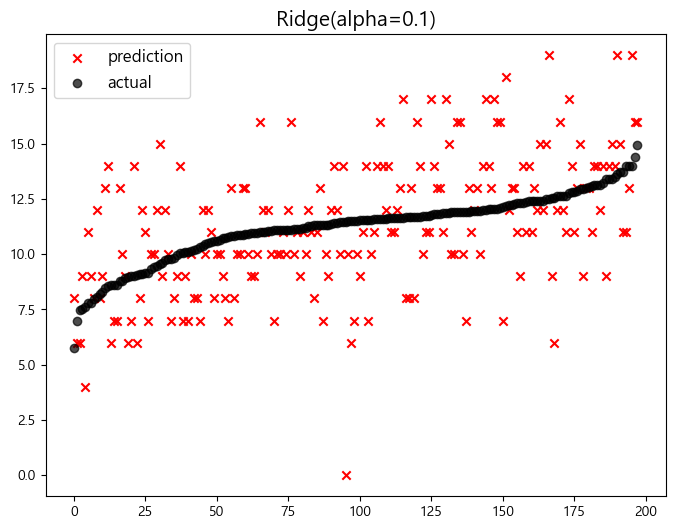

,model,error
0,LinearRegression,7.42504
1,Ridge(alpha=0.1),7.42418


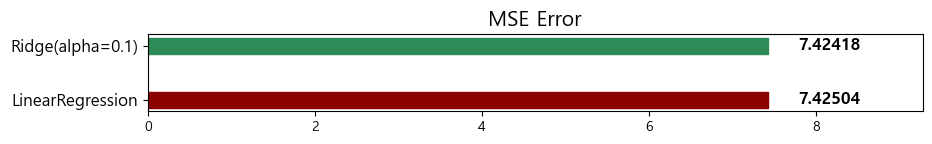

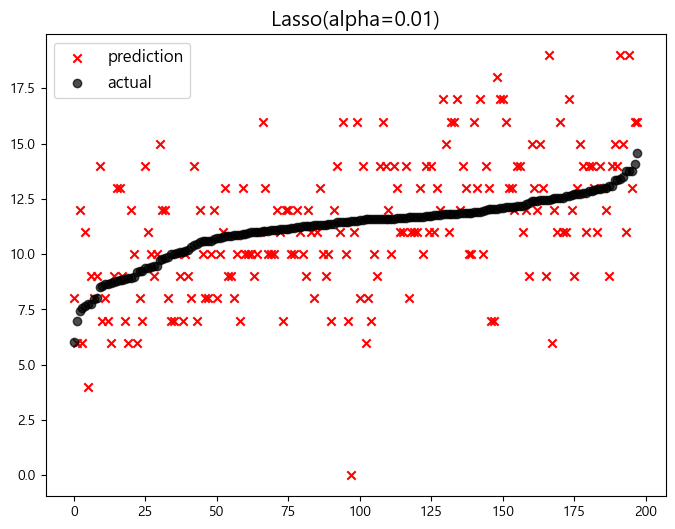

,model,error
0,LinearRegression,7.425040
1,Ridge(alpha=0.1),7.424180
2,Lasso(alpha=0.01),7.399647


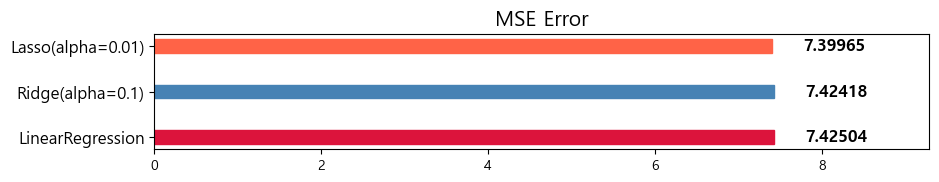

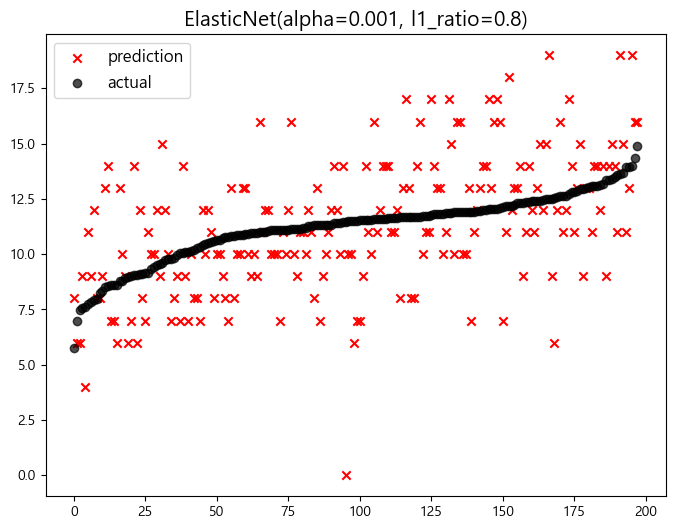

,model,error
0,LinearRegression,7.425040
1,Ridge(alpha=0.1),7.424180
2,"ElasticNet(alpha=0.001, l1_ratio=0.8)",7.417994
3,Lasso(alpha=0.01),7.399647


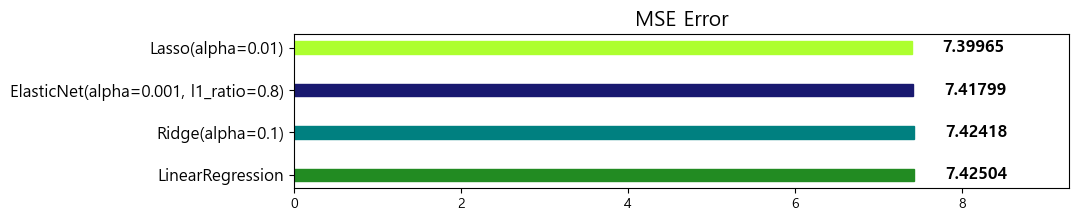

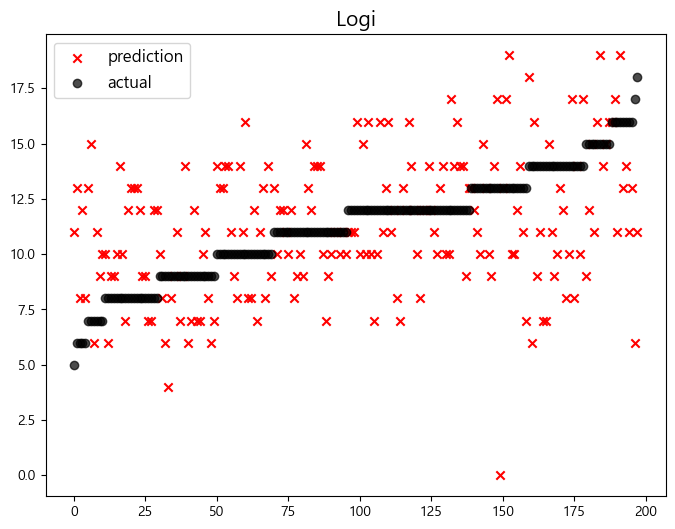

,model,error
0,Logi,11.141414
1,LinearRegression,7.425040
2,Ridge(alpha=0.1),7.424180
3,"ElasticNet(alpha=0.001, l1_ratio=0.8)",7.417994
4,Lasso(alpha=0.01),7.399647


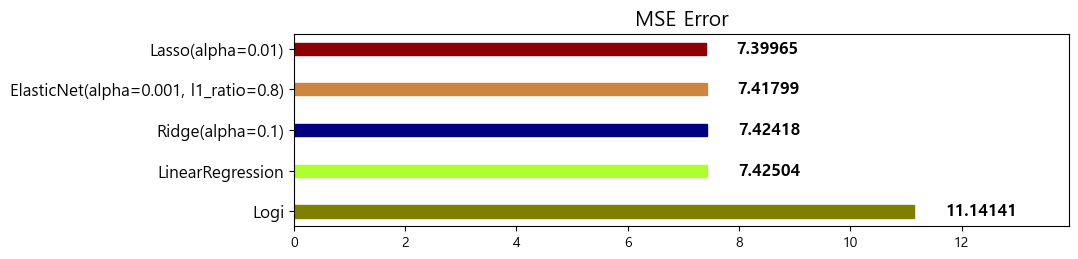

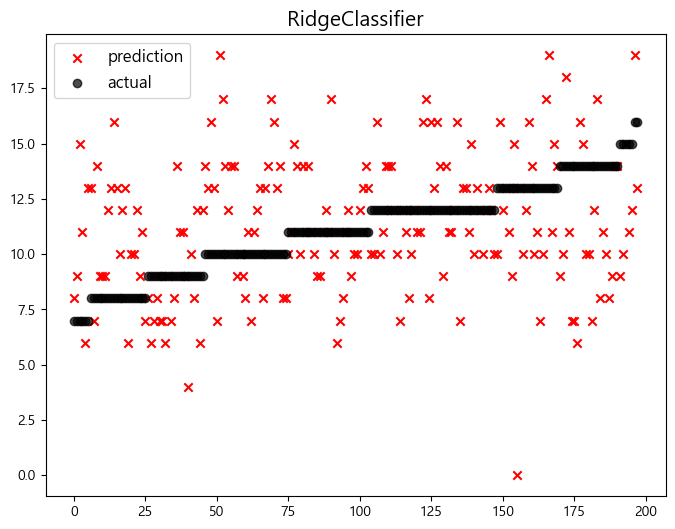

,model,error
0,RidgeClassifier,11.631313
1,Logi,11.141414
2,LinearRegression,7.425040
3,Ridge(alpha=0.1),7.424180
4,"ElasticNet(alpha=0.001, l1_ratio=0.8)",7.417994
5,Lasso(alpha=0.01),7.399647


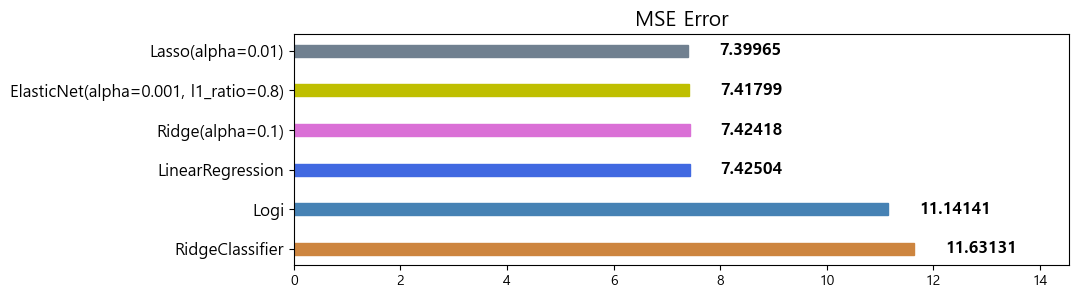

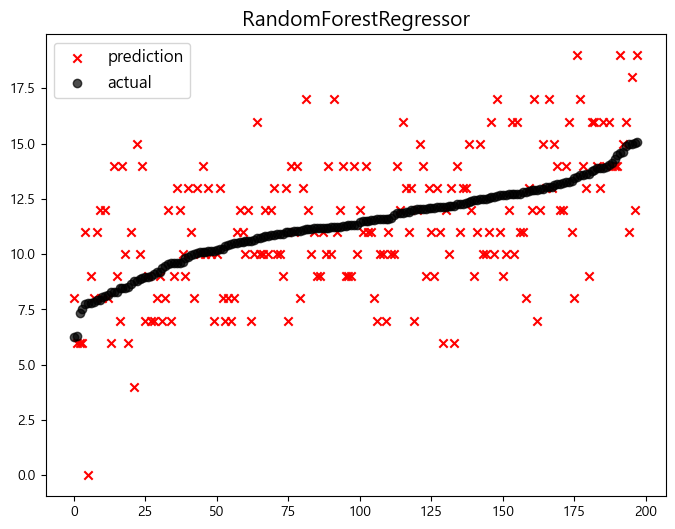

,model,error
0,RidgeClassifier,11.631313
1,Logi,11.141414
2,LinearRegression,7.425040
3,Ridge(alpha=0.1),7.424180
4,"ElasticNet(alpha=0.001, l1_ratio=0.8)",7.417994
5,Lasso(alpha=0.01),7.399647
6,RandomForestRegressor,6.931470


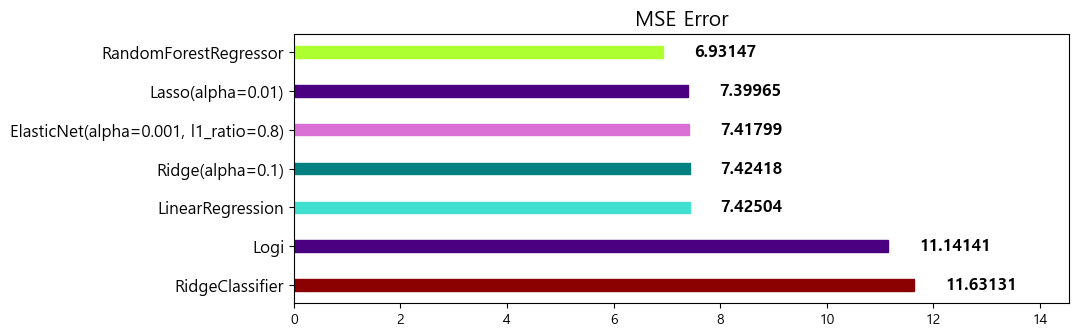

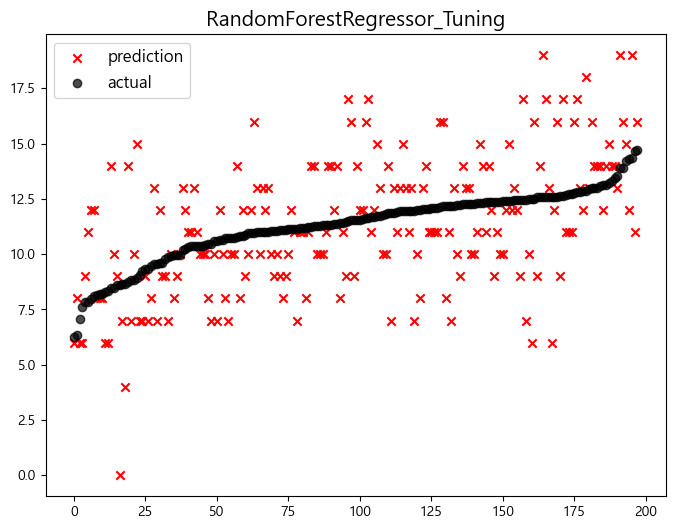

,model,error
0,RidgeClassifier,11.631313
1,Logi,11.141414
2,LinearRegression,7.425040
3,Ridge(alpha=0.1),7.424180
4,"ElasticNet(alpha=0.001, l1_ratio=0.8)",7.417994
5,Lasso(alpha=0.01),7.399647
6,RandomForestRegressor_Tuning,7.035723
7,RandomForestRegressor,6.931470


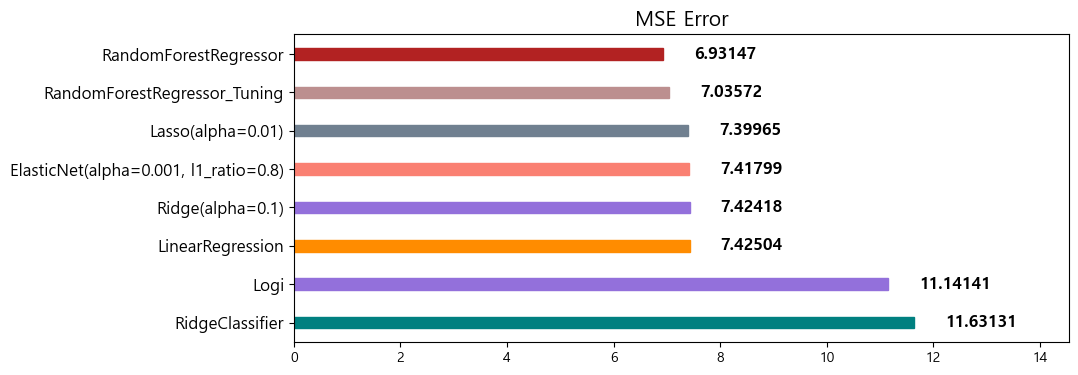

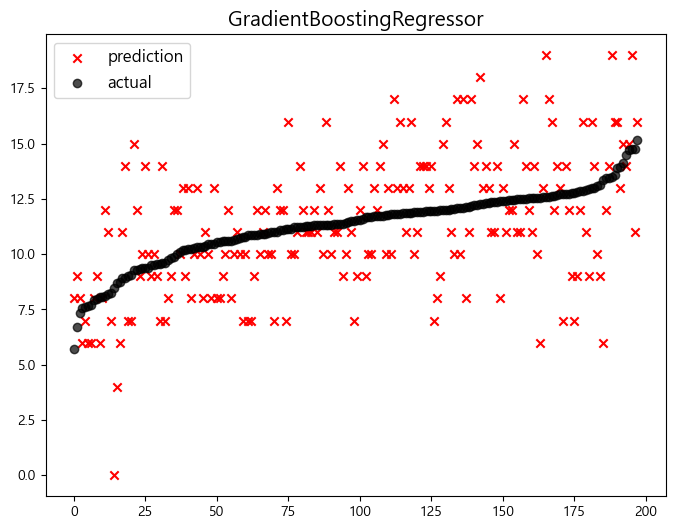

,model,error
0,RidgeClassifier,11.631313
1,Logi,11.141414
2,LinearRegression,7.425040
3,Ridge(alpha=0.1),7.424180
4,"ElasticNet(alpha=0.001, l1_ratio=0.8)",7.417994
5,Lasso(alpha=0.01),7.399647
6,GradientBoostingRegressor,7.127273
7,RandomForestRegressor_Tuning,7.035723
8,RandomForestRegressor,6.931470


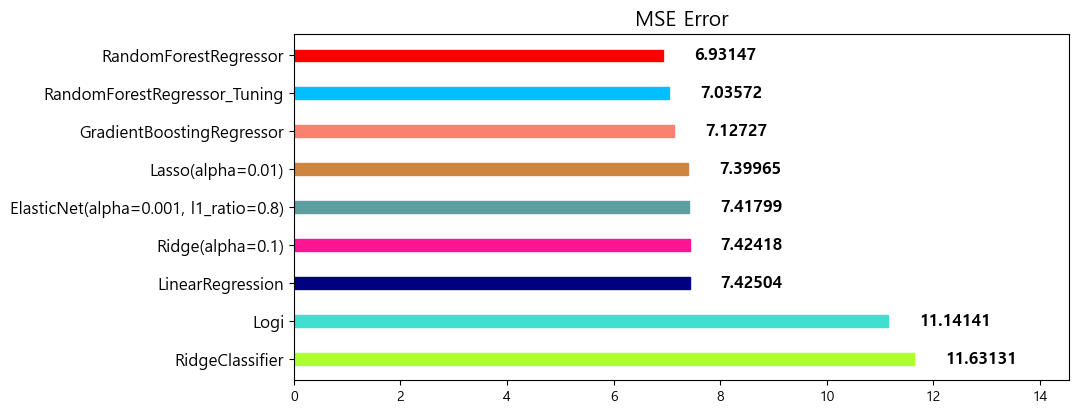

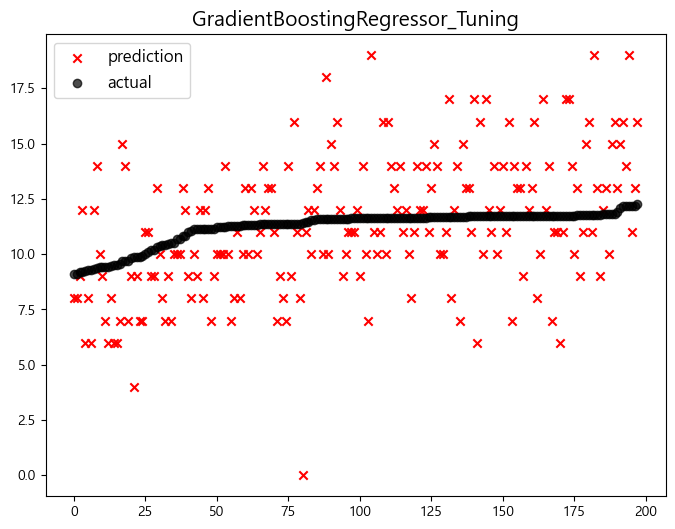

,model,error
0,RidgeClassifier,11.631313
1,Logi,11.141414
2,GradientBoostingRegressor_Tuning,8.213809
3,LinearRegression,7.425040
4,Ridge(alpha=0.1),7.424180
5,"ElasticNet(alpha=0.001, l1_ratio=0.8)",7.417994
6,Lasso(alpha=0.01),7.399647
7,GradientBoostingRegressor,7.127273
8,RandomForestRegressor_Tuning,7.035723
9,RandomForestRegressor,6.931470


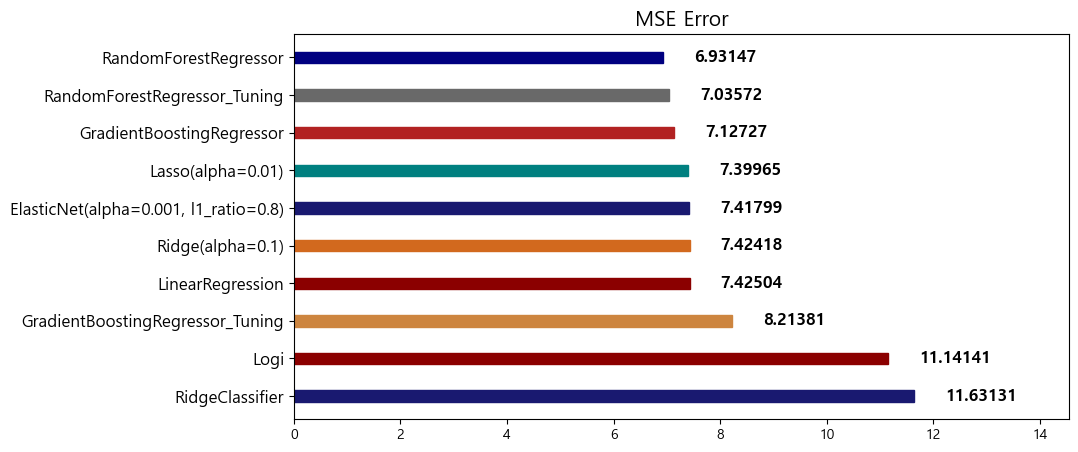

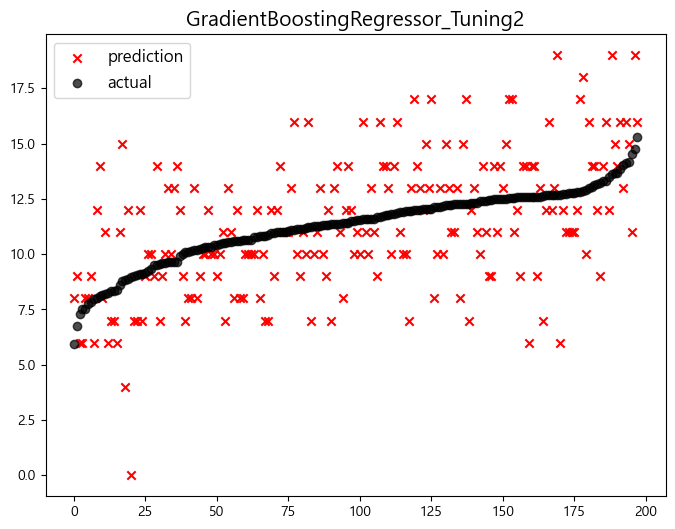

,model,error
0,RidgeClassifier,11.631313
1,Logi,11.141414
2,GradientBoostingRegressor_Tuning,8.213809
3,LinearRegression,7.425040
4,Ridge(alpha=0.1),7.424180
5,"ElasticNet(alpha=0.001, l1_ratio=0.8)",7.417994
6,Lasso(alpha=0.01),7.399647
7,GradientBoostingRegressor,7.127273
8,GradientBoostingRegressor_Tuning2,7.062650
9,RandomForestRegressor_Tuning,7.035723


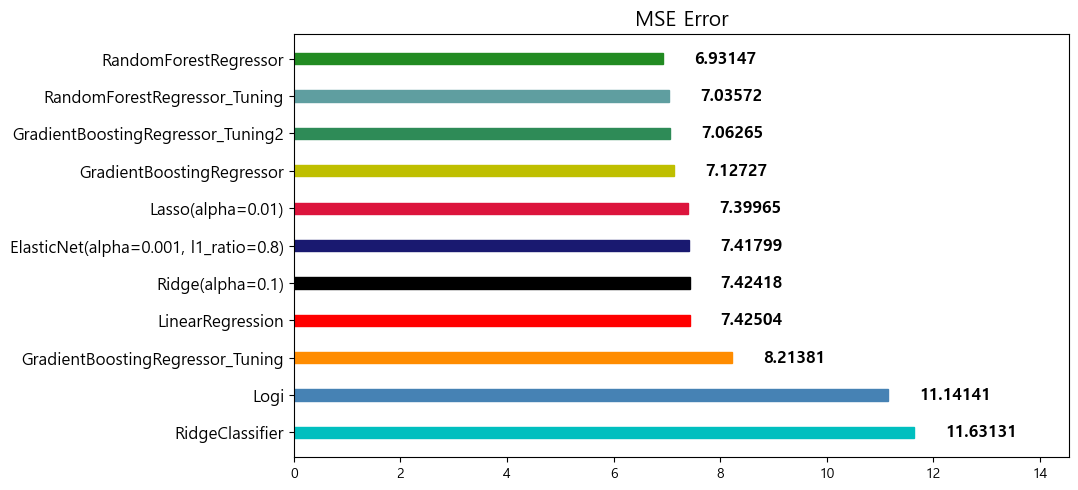

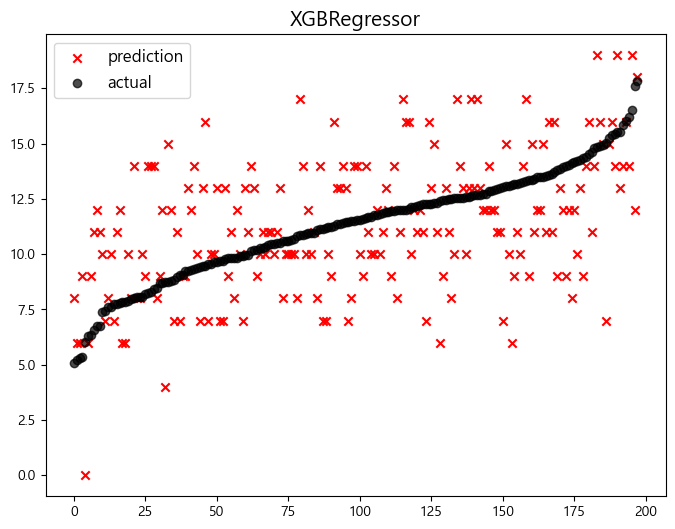

,model,error
0,RidgeClassifier,11.631313
1,Logi,11.141414
2,XGBRegressor,8.494402
3,GradientBoostingRegressor_Tuning,8.213809
4,LinearRegression,7.425040
5,Ridge(alpha=0.1),7.424180
6,"ElasticNet(alpha=0.001, l1_ratio=0.8)",7.417994
7,Lasso(alpha=0.01),7.399647
8,GradientBoostingRegressor,7.127273
9,GradientBoostingRegressor_Tuning2,7.062650


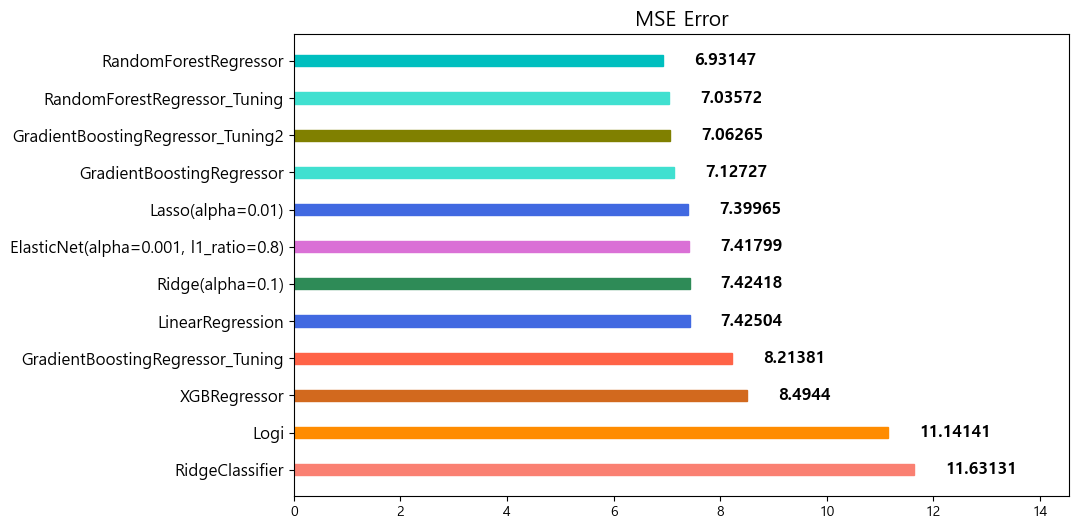

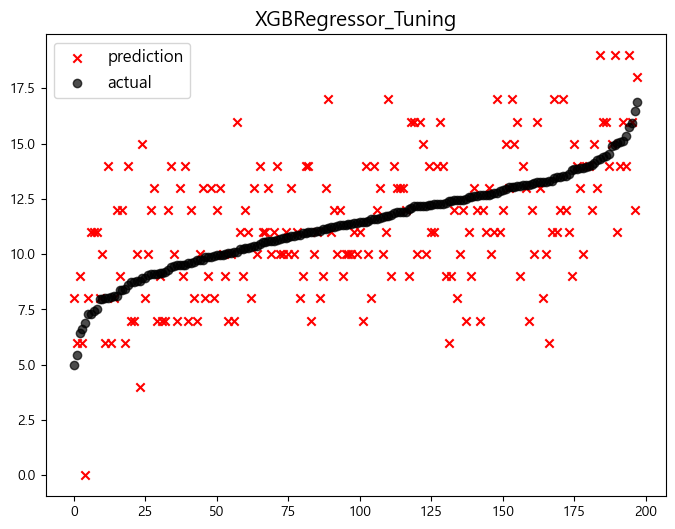

,model,error
0,RidgeClassifier,11.631313
1,Logi,11.141414
2,XGBRegressor,8.494402
3,GradientBoostingRegressor_Tuning,8.213809
4,LinearRegression,7.425040
5,Ridge(alpha=0.1),7.424180
6,"ElasticNet(alpha=0.001, l1_ratio=0.8)",7.417994
7,Lasso(alpha=0.01),7.399647
8,XGBRegressor_Tuning,7.393871
9,GradientBoostingRegressor,7.127273


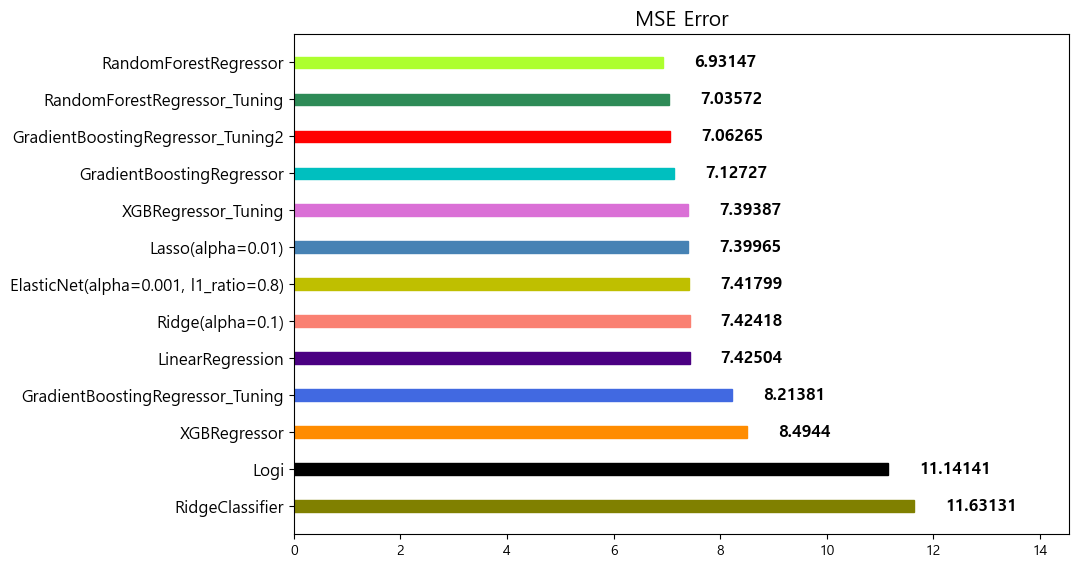

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001582 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 116
[LightGBM] [Info] Number of data points in the train set: 792, number of used features: 51
[LightGBM] [Info] Start training from score 11.238636
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

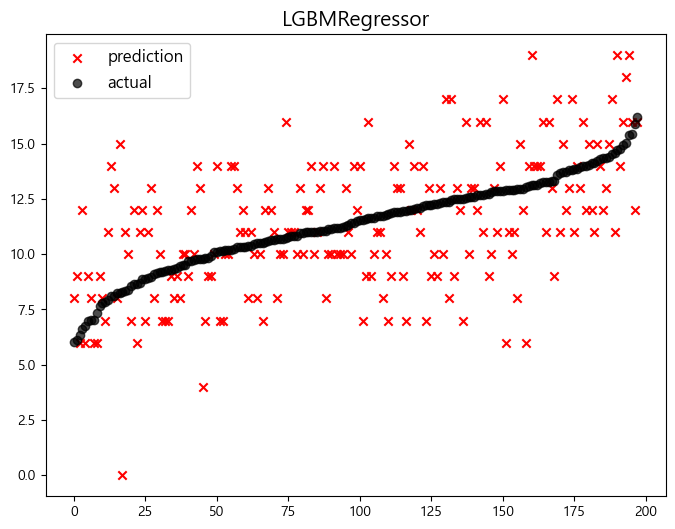

,model,error
0,RidgeClassifier,11.631313
1,Logi,11.141414
2,XGBRegressor,8.494402
3,GradientBoostingRegressor_Tuning,8.213809
4,LinearRegression,7.425040
5,Ridge(alpha=0.1),7.424180
6,"ElasticNet(alpha=0.001, l1_ratio=0.8)",7.417994
7,Lasso(alpha=0.01),7.399647
8,XGBRegressor_Tuning,7.393871
9,LGBMRegressor,7.144483


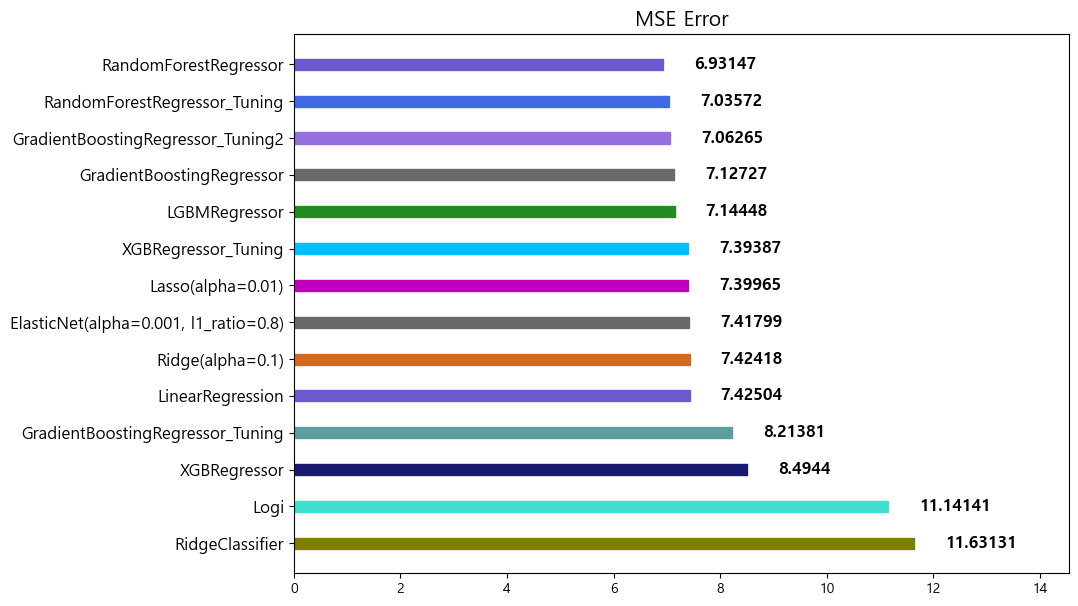

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000475 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 116
[LightGBM] [Info] Number of data points in the train set: 792, number of used features: 51
[LightGBM] [Info] Start training from score 11.238636
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

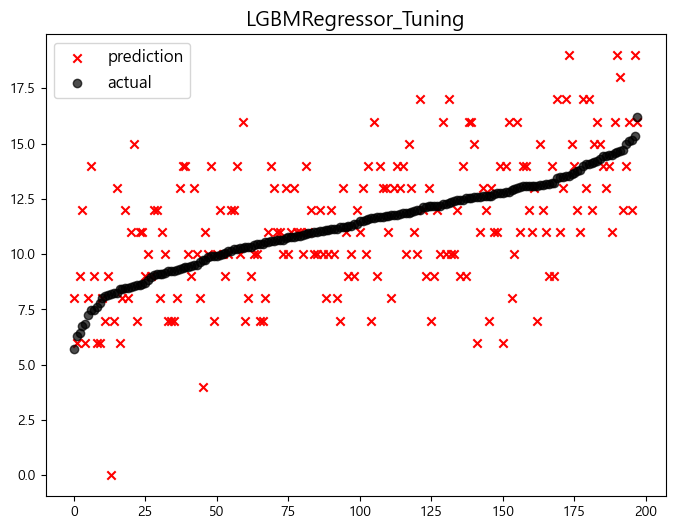

,model,error
0,RidgeClassifier,11.631313
1,Logi,11.141414
2,XGBRegressor,8.494402
3,GradientBoostingRegressor_Tuning,8.213809
4,LinearRegression,7.425040
5,Ridge(alpha=0.1),7.424180
6,"ElasticNet(alpha=0.001, l1_ratio=0.8)",7.417994
7,Lasso(alpha=0.01),7.399647
8,XGBRegressor_Tuning,7.393871
9,LGBMRegressor,7.144483


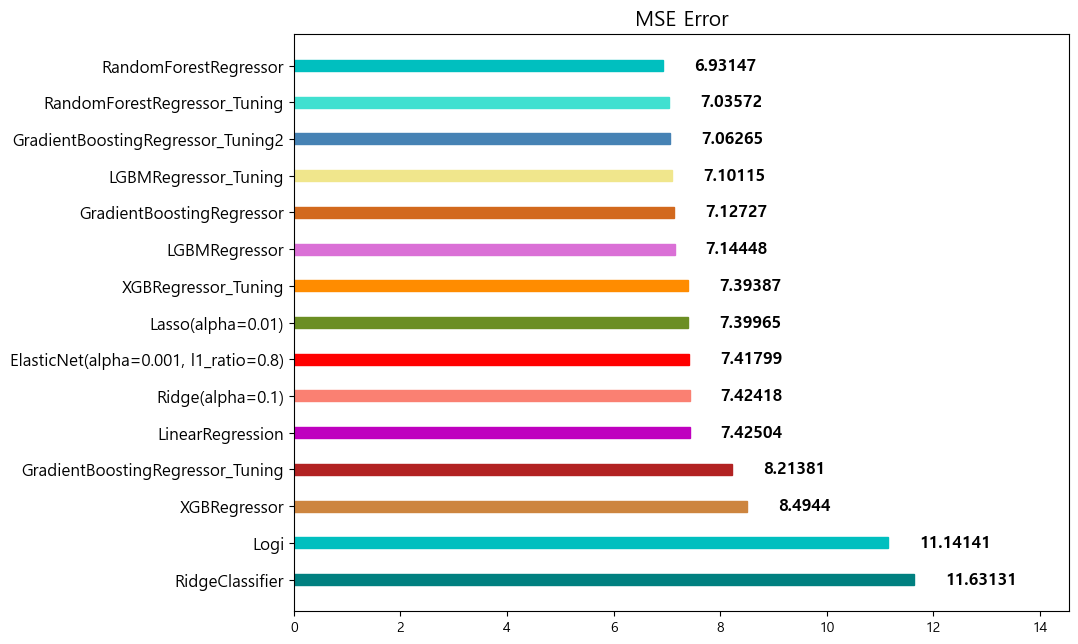

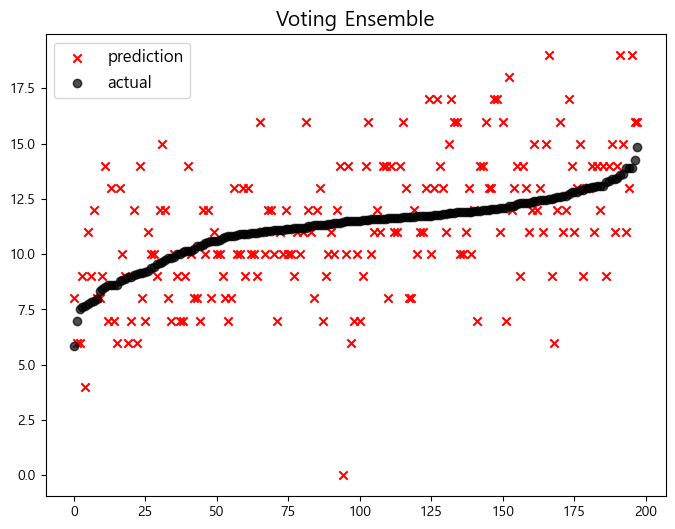

,model,error
0,RidgeClassifier,11.631313
1,Logi,11.141414
2,XGBRegressor,8.494402
3,GradientBoostingRegressor_Tuning,8.213809
4,LinearRegression,7.425040
5,Ridge(alpha=0.1),7.424180
6,"ElasticNet(alpha=0.001, l1_ratio=0.8)",7.417994
7,Voting Ensemble,7.411904
8,Lasso(alpha=0.01),7.399647
9,XGBRegressor_Tuning,7.393871


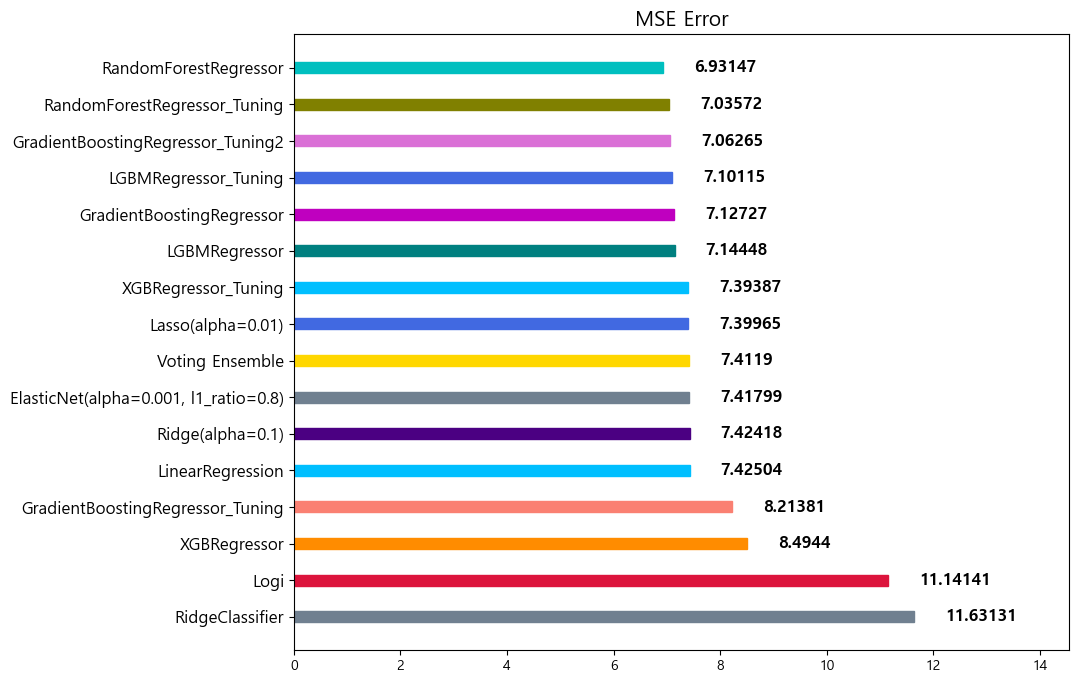

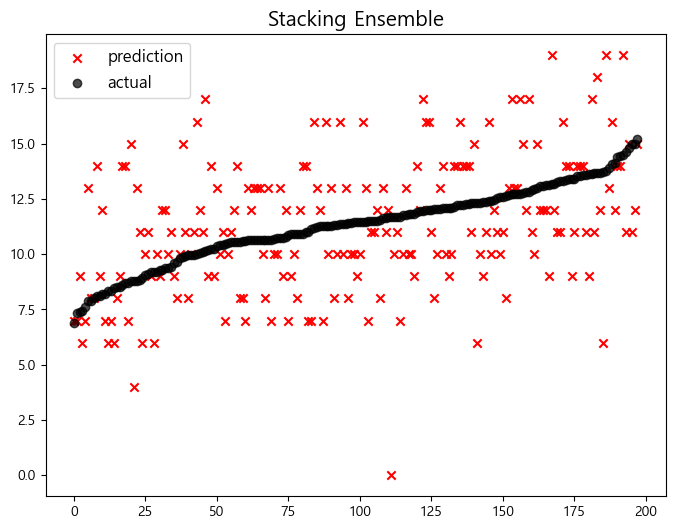

,model,error
0,RidgeClassifier,11.631313
1,Logi,11.141414
2,XGBRegressor,8.494402
3,Stacking Ensemble,8.358490
4,GradientBoostingRegressor_Tuning,8.213809
5,LinearRegression,7.425040
6,Ridge(alpha=0.1),7.424180
7,"ElasticNet(alpha=0.001, l1_ratio=0.8)",7.417994
8,Voting Ensemble,7.411904
9,Lasso(alpha=0.01),7.399647


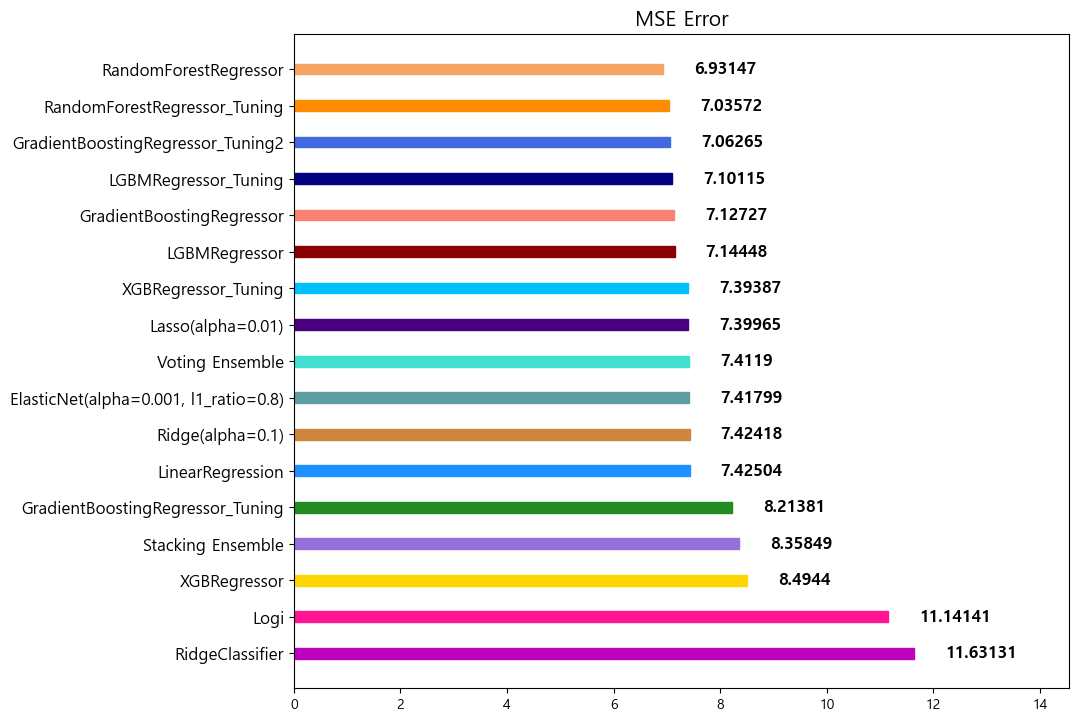

In [33]:
# 경고 메시지 출력 표기 생략
import warnings
import numpy as np
warnings.filterwarnings('ignore')

np.set_printoptions(suppress=True, precision=3)
SEED = 30
# 그래프 사이즈 설정
from teddynote import utils
utils.set_plot_options(figsize=(8, 6))
# MSE 에러 설정
utils.set_plot_error('mse')

X=df1.drop(columns = ["G1","health","Dalc","Walc","internet","reason","Mjob","Medu","school","sex","age"])
y =df1["G1"]

X = pd.get_dummies(X)

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import VotingRegressor, VotingClassifier
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.ensemble import GradientBoostingRegressor, GradientBoostingClassifier
from xgboost import XGBRegressor, XGBClassifier
from lightgbm import LGBMRegressor, LGBMClassifier
from sklearn.ensemble import StackingRegressor

# 모델들 및 매개변수 설정
models = [
    ('LinearRegression', LinearRegression()),
    ('Ridge(alpha=0.1)', Ridge(alpha=0.1)),
    ('Lasso(alpha=0.01)', Lasso(alpha=0.01)),
    ('ElasticNet(alpha=0.001, l1_ratio=0.8)', ElasticNet(alpha=0.001, l1_ratio=0.8)),
    ('Logi', LogisticRegression()),
    ('RidgeClassifier', RidgeClassifier()),
    ('RandomForestRegressor', RandomForestRegressor()),
    ('RandomForestRegressor_Tuning', RandomForestRegressor(random_state=SEED, n_estimators=1500, max_depth=9, max_features=0.9)),
    ('GradientBoostingRegressor', GradientBoostingRegressor()),
    ('GradientBoostingRegressor_Tuning', GradientBoostingRegressor(random_state=SEED, learning_rate=0.01)),
    ('GradientBoostingRegressor_Tuning2', GradientBoostingRegressor(random_state=SEED, learning_rate=0.01, n_estimators=1000, subsample=0.8)),
    ('XGBRegressor', XGBRegressor()),
    ('XGBRegressor_Tuning', XGBRegressor(random_state=SEED, learning_rate=0.01, n_estimators=1000, subsample=0.8, colsample_bytree=0.8, max_depth=7)),
    ('LGBMRegressor', LGBMRegressor()),
    ('LGBMRegressor_Tuning', LGBMRegressor(random_state=SEED, learning_rate=0.01, n_estimators=1000, colsample_bytree=0.9, n_jobs=-1))
]

# 각 모델에 대한 반복문
for model_name, model in models:
    # 모델 학습
    model.fit(X_train, y_train)
    # 예측
    pred = model.predict(X_test)
    # 예측 결과 시각화
    utils.plot_error(model_name, pred, y_test)

# VotingRegressor 앙상블
single_models = [
    ('linear_reg', LinearRegression()),
    ('ridge', Ridge(alpha=0.1)),
    ('lasso', Lasso(alpha=0.01)),
    ('elasticnet_pipeline', make_pipeline(StandardScaler(), ElasticNet(alpha=0.01, l1_ratio=0.8)))
]
voting_regressor = VotingRegressor(single_models)
voting_regressor.fit(X_train, y_train)
voting_pred = voting_regressor.predict(X_test)
utils.plot_error('Voting Ensemble', voting_pred, y_test)

# StackingRegressor 앙상블
stack_models = [
    ('elasticnet', make_pipeline(StandardScaler(), ElasticNet(alpha=0.01, l1_ratio=0.8))), 
    ('randomforest', RandomForestRegressor(random_state=SEED, n_estimators=1500, max_depth=9, max_features=17)), 
    ('gbr', GradientBoostingRegressor(random_state=SEED, learning_rate=0.01, n_estimators=1000, subsample=0.8)),
    ('lgbm', LGBMRegressor(random_state=SEED, learning_rate=0.01, n_estimators=1000, colsample_bytree=0.9, n_jobs=-1))
]
stack_reg = StackingRegressor(stack_models, final_estimator=XGBRegressor(random_state=SEED, learning_rate=0.01, n_estimators=1000, subsample=0.8, colsample_bytree=0.8, max_depth=7), n_jobs=-1)
stack_reg.fit(X_train, y_train)
stack_pred = stack_reg.predict(X_test)
utils.plot_error('Stacking Ensemble', stack_pred, y_test)


In [34]:
X.shape

(990, 52)

In [35]:
import numpy as np
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Random = RandomForestRegressor()

Random.fit(X_train, y_train)

y_pred = Random.predict(X_test)

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("R^2 Score:", r2)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print('acc Score:',Random.score(X_test, y_pred) )
y_train_pred = Random.predict(X_train)
mse_train = mean_squared_error(y_train, y_train_pred)
print("Train MSE:", mse_train)

R^2 Score: 0.29412043883118766
Mean Squared Error: 6.86125952696251
Root Mean Squared Error: 2.6194006045205285
acc Score: 1.0
Train MSE: 0.9815085037941419


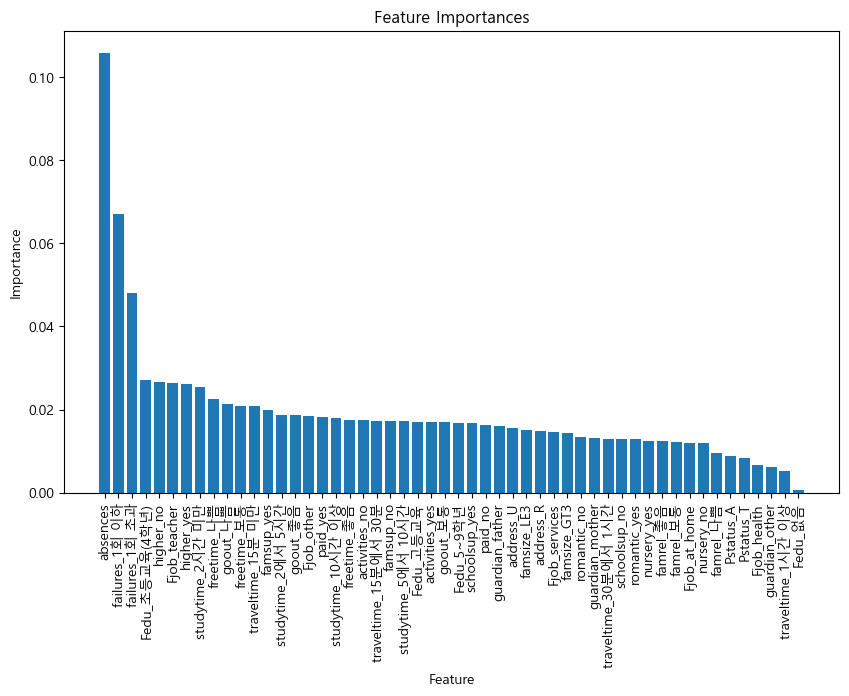

In [36]:
feature_importances = Random.feature_importances_
sorted_indices = np.argsort(feature_importances)[::-1]
feature_names = X.columns

plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), feature_importances[sorted_indices], align="center")
plt.xticks(range(X.shape[1]), feature_names[sorted_indices], rotation=90)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.show()

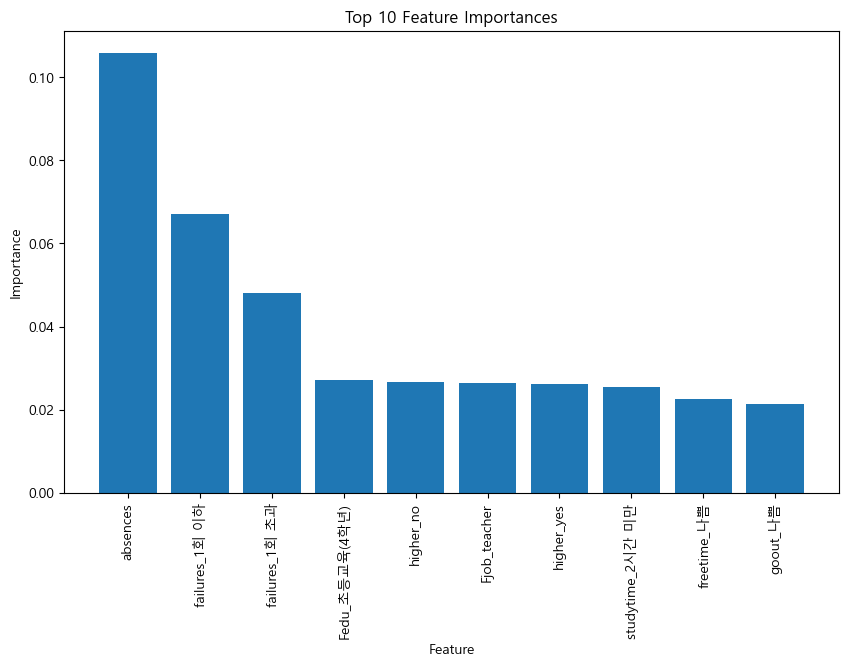

In [37]:
import matplotlib.pyplot as plt

# 피처 중요도 추출
feature_importances = Random.feature_importances_

# 피처 중요도를 내림차순으로 정렬하여 상위 10개의 인덱스 추출
top_indices = np.argsort(feature_importances)[::-1][:10]

# 상위 10개의 피처와 중요도 추출
top_features = X.columns[top_indices]
top_importances = feature_importances[top_indices]

# 상위 10개의 피처 중요도 시각화
plt.figure(figsize=(10, 6))
plt.bar(range(len(top_features)), top_importances, align="center")
plt.xticks(range(len(top_features)), top_features, rotation=90)
plt.title("Top 10 Feature Importances")
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.show()

In [38]:
X=df1.drop(columns = ["G1","health","Dalc","Walc","internet","reason","Mjob","Medu","school","sex","age"])

In [39]:
X

,address,famsize,Pstatus,Fedu,Fjob,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,romantic,famrel,freetime,goout,absences
0,U,GT3,A,고등교육,teacher,mother,15분에서 30분,2에서 5시간,1회 초과,yes,no,no,no,yes,yes,no,좋음,보통,좋음,6
1,U,GT3,T,초등교육(4학년),other,father,15분 미만,2에서 5시간,1회 초과,no,yes,no,no,no,yes,no,좋음,보통,보통,4
2,U,LE3,T,초등교육(4학년),other,mother,15분 미만,2에서 5시간,1회 초과,yes,no,yes,no,yes,yes,no,좋음,보통,나쁨,10
3,U,GT3,T,5~9학년,services,mother,15분 미만,5에서 10시간,1회 초과,no,yes,yes,yes,yes,yes,yes,보통,나쁨,나쁨,2
4,U,GT3,T,고등교육,other,father,15분 미만,2에서 5시간,1회 초과,no,yes,yes,no,yes,yes,no,좋음,보통,나쁨,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,R,GT3,T,고등교육,other,mother,15분 미만,5에서 10시간,1회 이하,no,no,no,yes,no,yes,no,좋음,좋음,나쁨,4
645,U,LE3,T,초등교육(4학년),services,mother,15분 미만,2에서 5시간,1회 초과,no,yes,no,no,yes,yes,no,좋음,보통,좋음,4
646,U,GT3,T,초등교육(4학년),other,mother,15분에서 30분,2에서 5시간,1회 초과,no,no,no,yes,yes,yes,no,나쁨,나쁨,나쁨,6
647,U,LE3,T,초등교육(4학년),services,mother,15분에서 30분,2시간 미만,1회 초과,no,no,no,no,no,yes,no,나쁨,좋음,좋음,6


In [41]:
import numpy as np
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor

X=df1.drop(columns = ["G1","health","Dalc","Walc","internet","reason","Mjob","Medu","school","sex","age"])
y =df1["G1"]

X = pd.get_dummies(X)

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=SEED)

# 랜덤 포레스트 모델 초기화
Random = RandomForestRegressor(random_state=42)

# 탐색할 하이퍼파라미터 그리드 설정
param_grid = {
    'n_estimators': [50, 100, 150],  # 트리의 개수
    'max_depth': [None, 10, 20],       # 트리의 최대 깊이
    'min_samples_split': [2, 5, 10],   # 노드를 분할하기 위한 최소 샘플 수
    'min_samples_leaf': [1, 2, 4]      # 리프 노드에 필요한 최소 샘플 수
}

# GridSearchCV를 사용하여 최적의 하이퍼파라미터 탐색
grid_search = GridSearchCV(Random, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

# 최적의 하이퍼파라미터 출력
print("Best parameters:", grid_search.best_params_)

# 최적의 모델 선택
best_model = grid_search.best_estimator_

# 테스트 데이터에 대한 예측 수행
y_pred = best_model.predict(X_test)

# 성능 평가
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

# 결과 출력
print("R^2 Score:", r2)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)

# 추가적인 평가
print('Accuracy Score:', best_model.score(X_test, y_test))  # 테스트 데이터에 대한 정확도
y_train_pred = best_model.predict(X_train)
mse_train = mean_squared_error(y_train, y_train_pred)
print("Train MSE:", mse_train)


Best parameters: {'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 150}
R^2 Score: 0.21599678719230497
Mean Squared Error: 6.359057178385933
Root Mean Squared Error: 2.521717109111554
Accuracy Score: 0.21599678719230497
Train MSE: 1.8097069038714768
